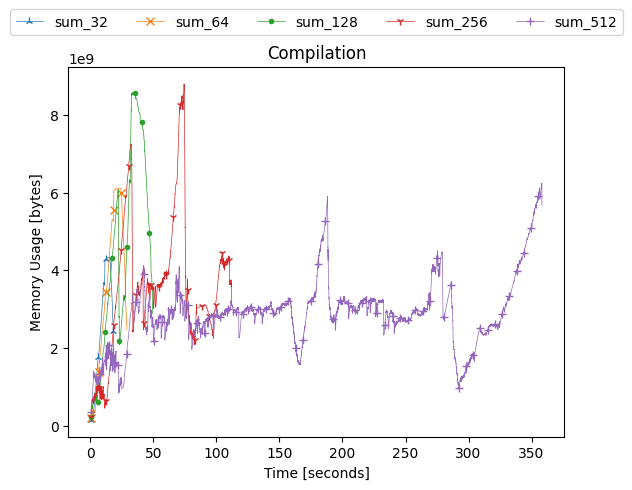

In [65]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/sum_{}/measurements/compilation.json"
batch_sizes = [32, 64, 128, 256, 512]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        times = data[0]["time_series"]["sample_milliseconds"]
        memory = data[0]["time_series"]["memory_bytes"]
        plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=2500, label="sum_{}".format(batch_sizes[index]))

with PdfPages("sum/compilation.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.175), loc='upper center', ncols=5)
    plt.title('Compilation')
    pdf.savefig(bbox_inches="tight")
    plt.show()

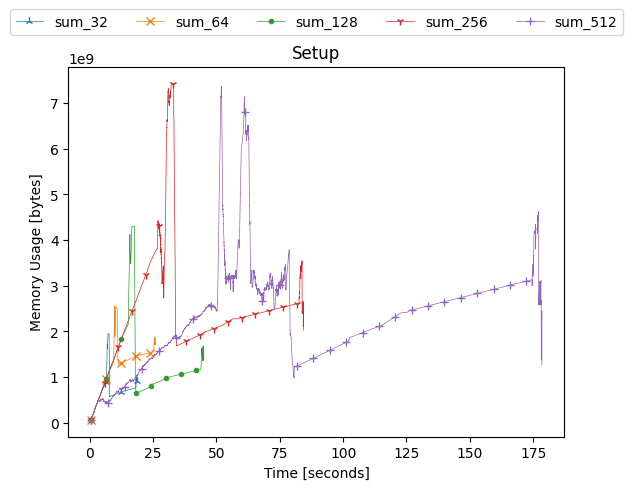

In [66]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/sum_{}/measurements/setup.json"
batch_sizes = [32, 64, 128, 256, 512]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        times = data[0]["time_series"]["sample_milliseconds"]
        memory = data[0]["time_series"]["memory_bytes"]
        plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=2500, label="sum_{}".format(batch_sizes[index]))

with PdfPages("sum/setup.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.175), loc='upper center', ncols=5)
    plt.title('Setup')
    pdf.savefig(bbox_inches="tight")
    plt.show()

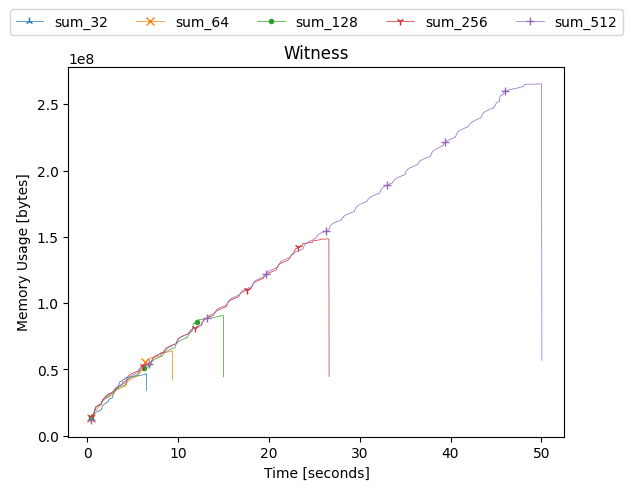

In [67]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/sum_{}/measurements/witness.json"
batch_sizes = [32, 64, 128, 256, 512]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        times = data[0]["time_series"]["sample_milliseconds"]
        memory = data[0]["time_series"]["memory_bytes"]
        plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=2500, label="sum_{}".format(batch_sizes[index]))

with PdfPages("sum/witness.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.175), loc='upper center', ncols=5)
    plt.title('Witness')
    pdf.savefig(bbox_inches="tight")
    plt.show()

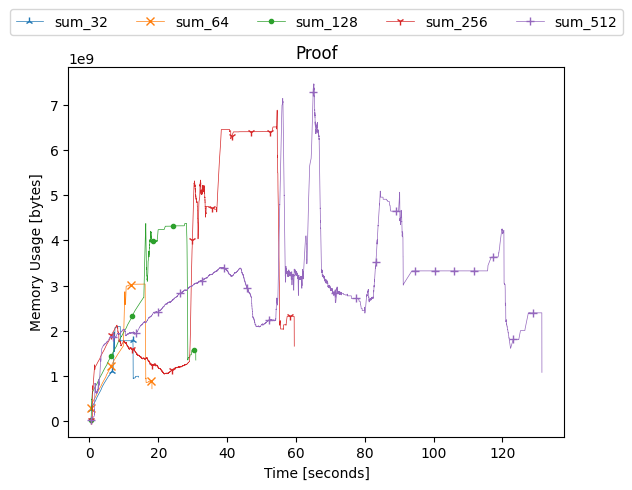

In [68]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/sum_{}/measurements/proof.json"
batch_sizes = [32, 64, 128, 256, 512]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        times = data[0]["time_series"]["sample_milliseconds"]
        memory = data[0]["time_series"]["memory_bytes"]
        plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=2500, label="sum_{}".format(batch_sizes[index]))

with PdfPages("sum/proof.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.175), loc='upper center', ncols=5)
    plt.title('Proof')
    pdf.savefig(bbox_inches="tight")
    plt.show()

In [69]:
import os
import pandas as pd
import numpy as np
import re

path = "sum/sum_{}/measurements/compilation.json"
batch_sizes = [32, 64, 128, 256, 512]

rows = []
for index, batch_size in enumerate(batch_sizes):
    row = []
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        execution_time = data[0]["process"]["execution_time"]
        memory_avg = round(np.average(data[0]["time_series"]["memory_bytes"])*10**(-9),3)
        constraints = re.findall(r'\d+', data[0]["process"]["stdout_data"])[0]
        row.append(execution_time)
        row.append(memory_avg)
        row.append(constraints)
    rows.append(row)

dfObj = pd.DataFrame(np.transpose(rows), columns = ['sum_32' , 'sum_64', 'sum_128' , 'sum_256', 'sum_512'], index=['Compile Time [sec]', 'Compile Memory [GB]', 'Constraints'])
print(dfObj)

                     sum_32  sum_64 sum_128  sum_256  sum_512
Compile Time [sec]   18.575  29.035  49.465  112.135  358.286
Compile Memory [GB]   2.584   3.561   4.415    3.576    2.929
Constraints          278954  451900  797792  1489576  2873144


In [70]:
path = "sum/sum_{}/measurements/setup.json"
batch_sizes = [32, 64, 128, 256, 512]

rows = []
for index, batch_size in enumerate(batch_sizes):
    row = []
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        execution_time = data[0]["process"]["execution_time"]
        memory_avg = round(np.average(data[0]["time_series"]["memory_bytes"])*10**(-9),3)
        row.append(execution_time)
        row.append(memory_avg)
    rows.append(row)

dfObj = pd.DataFrame(np.transpose(rows), columns = ['sum_32' , 'sum_64', 'sum_128' , 'sum_256', 'sum_512'], index=['Setup Time [sec]', 'Setup Memory [GB]'])
print(dfObj)

                   sum_32  sum_64  sum_128  sum_256  sum_512
Setup Time [sec]   18.573  25.755   44.828   84.404  178.548
Setup Memory [GB]   0.693   1.248    1.208    2.434    2.324


In [71]:
path = "sum/sum_{}/measurements/witness.json"
batch_sizes = [32, 64, 128, 256, 512]

rows = []
for index, batch_size in enumerate(batch_sizes):
    row = []
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        execution_time = data[0]["process"]["execution_time"]
        memory_avg = round(np.average(data[0]["time_series"]["memory_bytes"])*10**(-9),3)
        row.append(execution_time)
        row.append(memory_avg)
    rows.append(row)

dfObj = pd.DataFrame(np.transpose(rows), columns = ['sum_32' , 'sum_64', 'sum_128' , 'sum_256', 'sum_512'], index=['Witness Time [sec]', 'Witness Memory [GB]'])
print(dfObj)

                     sum_32  sum_64  sum_128  sum_256  sum_512
Witness Time [sec]    6.541   9.407   15.028   26.636   50.060
Witness Memory [GB]   0.034   0.043    0.058    0.089    0.148


In [64]:
path = "sum/sum_{}/measurements/proof.json"
batch_sizes = [32, 64, 128, 256, 512]

rows = []
for index, batch_size in enumerate(batch_sizes):
    row = []
    with open(path.format(batch_size)) as f:  
        data = json.load(f)
        execution_time = data[0]["process"]["execution_time"]
        memory_avg = round(np.average(data[0]["time_series"]["memory_bytes"])*10**(-9),3)
        row.append(execution_time)
        row.append(memory_avg)
    rows.append(row)

dfObj = pd.DataFrame(np.transpose(rows), columns = ['sum_32' , 'sum_64', 'sum_128' , 'sum_256', 'sum_512'], index=['Proof Time [sec]', 'Proof Memory [GB]'])
print(dfObj)

                   sum_32  sum_64  sum_128  sum_256  sum_512
Proof Time [sec]   14.259  18.158   30.908   59.524  131.485
Proof Memory [GB]   1.240   1.730    2.694    3.439    3.029
